# from Below models, 'model' and 'ml_Profit1' are good as its r square value is very good.and its accuracy is 95%.

In [146]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [148]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [149]:
df=df.rename({'R&D Spend':'rnd_spend','Marketing Spend':'marketing_spend'},axis=1)

In [150]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [151]:
df.shape

(50, 5)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rnd_spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   marketing_spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [153]:
df.corr()
#Observe that Profit and rnd_spend has high coorelation which will lead to high collinearity

,rnd_spend,Administration,marketing_spend,Profit
rnd_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Profit', ylabel='Density'>

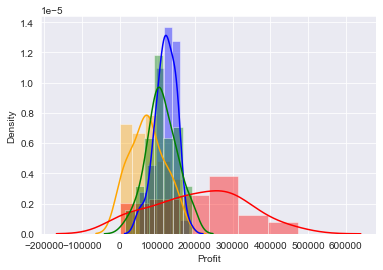

In [154]:
sns.distplot(df['rnd_spend'], color = 'Orange')
sns.distplot(df['Administration'], color = 'Blue')
sns.distplot(df['marketing_spend'], color ='Red')
sns.distplot(df['Profit'] , color = 'Green')


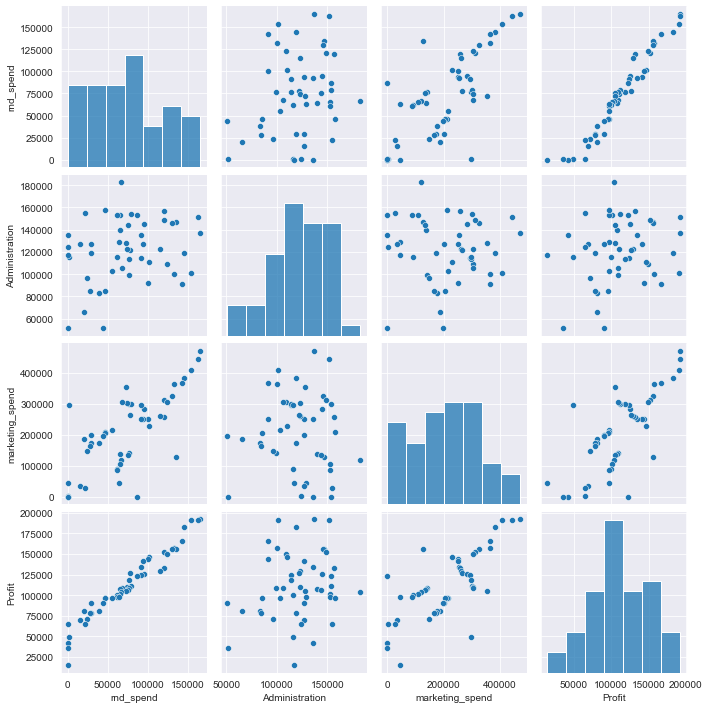

In [155]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [156]:
#Build MOdel
model = smf.ols('Profit~Administration+marketing_spend+rnd_spend', data = df).fit()

In [157]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        16:02:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
rnd_spend           0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
model_predictions = model.predict(df)
model_predictions

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [159]:
df['model_Profit']=model_predictions

In [160]:
df['residuals']=model.resid
df

,rnd_spend,Administration,marketing_spend,State,Profit,model_Profit,residuals
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


In [161]:
model.params

Intercept          50122.192990
Administration        -0.026816
marketing_spend        0.027228
rnd_spend              0.805715
dtype: float64

In [162]:
print(model.tvalues,'\n',model.pvalues)

Intercept           7.626218
Administration     -0.525507
marketing_spend     1.655077
rnd_spend          17.846374
dtype: float64 
 Intercept          1.057379e-09
Administration     6.017551e-01
marketing_spend    1.047168e-01
rnd_spend          2.634968e-22
dtype: float64


# High Influence Points

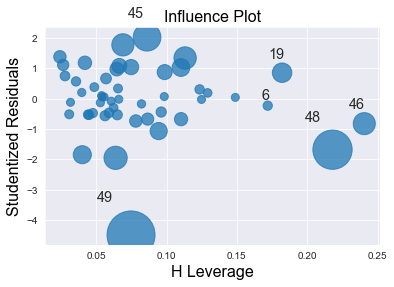

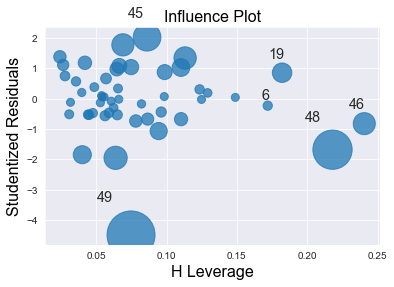

In [163]:
import statsmodels.api as sm
sm.graphics.influence_plot(model)
#So 49,48,46,19,6 are highly influential index.

# Test for Normality of Residuals (Q-Q Plot) and Residual Analysis

In [164]:
sample = np.random.normal(40,30,1000)
sample

array([ 67.2582014 ,  34.24646507,  92.13917257,  27.95149741,
         7.82114997,  35.45748596,  -0.86601106,  52.47262552,
        40.4986064 ,  42.41463782,  28.68023102,  67.43309745,
        74.87108818,  16.83750123,  56.06961777,  40.45960636,
        15.37778903,  67.75589574, 109.64951788, 114.56520734,
        15.57720469,  96.35177868,  10.97233322,  18.52159463,
       107.7905544 ,  38.32310073,  51.41577796,  18.0111322 ,
        38.91008243,  58.76896425,  58.31746221,   3.66945851,
        16.20682624,  -2.22403886,  34.24016804,  64.14021126,
        40.66153732, -14.74090441,  -8.30293221,  34.876992  ,
        88.10733156,  75.77179621,  44.44253508,  26.17564484,
       124.46532517,  63.81469082, 106.6734393 , 106.01672643,
        57.17903745,  23.85879661, -14.11011168,  38.91961159,
        60.49509825,  26.18260834,  55.24172933,  32.67335002,
        73.70661936,  46.27804086,  -9.77104267,  42.09839211,
        17.37104568,  79.88843049,  44.3290644 ,  -7.10

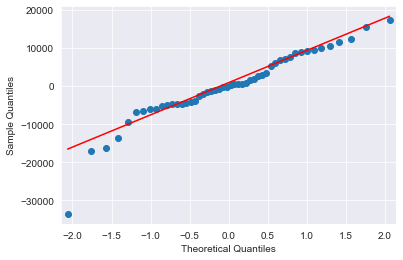

In [165]:
import statsmodels.api as sm
qqplot = sm.qqplot(df.residuals, line = 'q')
#This qq plot shows that the residuals are almost normal

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residuals', ylabel='Density'>

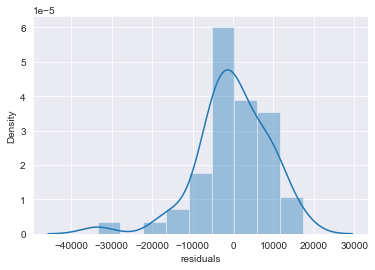

In [166]:
sns.distplot(df.residuals)

In [167]:
df.residuals.mean()   # mean is almost near to zero which is good thing.

9.633367881178856e-11

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


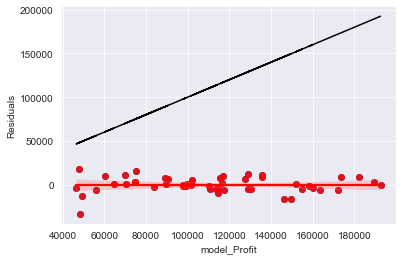

In [168]:
plt.scatter(x=df['model_Profit'],y=df['residuals'])
plt.plot(df['model_Profit'],model_predictions,color='black')
sns.regplot(df.model_Profit,df.residuals,color = 'red')
plt.xlabel('model_Profit')
plt.ylabel('Residuals')
plt.show()

Text(0, 0.5, 'residuals')

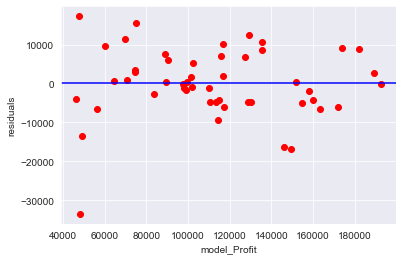

In [169]:
plt.scatter(df.model_Profit,df.residuals,c="r"),plt.axhline(y=0,color='blue');
plt.xlabel("model_Profit");
plt.ylabel("residuals")
#This plot shows that the residuals and ml_Price have almost"same variance"

In [170]:
model2 = smf.ols('rnd_spend~Profit+Administration+marketing_spend', data = df).fit()
model2.rsquared

0.9488830971212534

In [171]:
model3 = smf.ols('marketing_spend~rnd_spend+Profit+Administration', data = df).fit()
model3.rsquared

0.5943750647160793

In [172]:
model4 = smf.ols('Administration~marketing_spend+rnd_spend+Profit', data = df).fit()
model4.rsquared

0.1540804929639905

# Now create simple Linear Regression Model

In [173]:
ml_Profit = smf.ols('Profit~Administration',data=df).fit()
print(model.tvalues,'\n',model.pvalues)
ml_Profit.rsquared

Intercept           7.626218
Administration     -0.525507
marketing_spend     1.655077
rnd_spend          17.846374
dtype: float64 
 Intercept          1.057379e-09
Administration     6.017551e-01
marketing_spend    1.047168e-01
rnd_spend          2.634968e-22
dtype: float64


0.04028714077757223

In [174]:
ml_Profit1 = smf.ols('Profit~rnd_spend',data=df).fit()
print(model.tvalues,'\n',model.pvalues)
ml_Profit1.rsquared

Intercept           7.626218
Administration     -0.525507
marketing_spend     1.655077
rnd_spend          17.846374
dtype: float64 
 Intercept          1.057379e-09
Administration     6.017551e-01
marketing_spend    1.047168e-01
rnd_spend          2.634968e-22
dtype: float64


0.9465353160804393

In [175]:
ml_Profit2 = smf.ols('Profit~marketing_spend',data=df).fit()
print(model.tvalues,'\n',model.pvalues)
ml_Profit2.rsquared

Intercept           7.626218
Administration     -0.525507
marketing_spend     1.655077
rnd_spend          17.846374
dtype: float64 
 Intercept          1.057379e-09
Administration     6.017551e-01
marketing_spend    1.047168e-01
rnd_spend          2.634968e-22
dtype: float64


0.5591535746115515

In [176]:
#from above models, 'model' and 'ml_Profit1' are good as its r square value is very good.and its accuracy is 95%.